Geographical boundary and coverage

Run this file in the python environment

__________________________________________________

Import the csv datafile here.

In the file explorer right click the dataset and copy path, then paste between the "..."

Any backslashes should be replaced by double backslash.

Make sure that the csv file is seperated by commas.

In [2]:
import pandas as pd

ais = pd.read_csv("Dataset.csv",sep=",") # Paste the datafile here
ais.head()

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_6520\11124247.py:3: DtypeWarning: Columns (4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ais = pd.read_csv("Dataset.csv",sep=",") # Paste the datafile here


,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,ETA,A,B,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5
0,2023-10-28 07:17:51.000,BSVDM,A,1.0,353246000,Underway using engine,0.0,0.0,0.0,12.5,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2023-10-28 07:17:51.278,BSVDO,A,4.0,2579991,NaN,0.0,0.0,NaN,NaN,...,2023-10-28 07:12:19,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2023-10-28 07:17:52.488,BSADS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,STX564855481005,71220.0,V,0.0,I
3,2023-10-28 07:17:52.657,BSVDM,A,1.0,431697000,Underway using engine,0.0,0.0,0.0,11.3,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2023-10-28 07:17:53.519,PSTXI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,INFO,2.0,0,0.0,1


Subset the dataset for a specific region

In [3]:
ais_subset = ais[ais["Region"]=='QH69']

Remove rows where "Longitude" and "Latitude" values are 0 (for some message types the longitude and latitude is not given) 

In [4]:
#Remove rows where Longitude & Latitude is 0
ais_cleaned = ais_subset[(ais['Longitude'] != 0) & (ais_subset['Latitude'] != 0)]

#Remove columns with any empty Timestamp values as well
ais_cleaned = ais_cleaned.dropna(subset=['Timestamp'], axis=0)

# Check the results
ais_cleaned.head()

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_6520\4134776463.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ais_cleaned = ais_subset[(ais['Longitude'] != 0) & (ais_subset['Latitude'] != 0)]


,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,ETA,A,B,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5
0,2023-10-28 07:17:51.000,BSVDM,A,1.0,353246000,Underway using engine,0.0,0.0,0.0,12.5,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2023-10-28 07:17:51.278,BSVDO,A,4.0,2579991,NaN,0.0,0.0,NaN,NaN,...,2023-10-28 07:12:19,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2023-10-28 07:17:52.657,BSVDM,A,1.0,431697000,Underway using engine,0.0,0.0,0.0,11.3,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
7,2023-10-28 07:18:00.457,BSVDM,B,1.0,353246000,Underway using engine,0.0,0.0,0.0,12.5,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
8,2023-10-28 07:18:01.242,BSVDO,B,4.0,2579991,NaN,0.0,0.0,NaN,NaN,...,2023-10-28 07:12:29,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Check the minimum and maximum values of longitude and latitude

In [5]:
# Get the geographical boundaries
min_latitude = ais_cleaned['Latitude'].min()
max_latitude = ais_cleaned['Latitude'].max()
min_longitude = ais_cleaned['Longitude'].min()
max_longitude = ais_cleaned['Longitude'].max()

# Check the rage results
print(f'Latitude range: {min_latitude} to {max_latitude}')
print(f'Longitude range: {min_longitude} to {max_longitude}')


Latitude range: -11.0 to -10.00000333333334
Longitude range: 152.0 to 153.07865333333334


Visualization of coverage of the lat & long in this dataset

Plot a red box with the longitude and latitude boundaries and plot the datapoints as well.

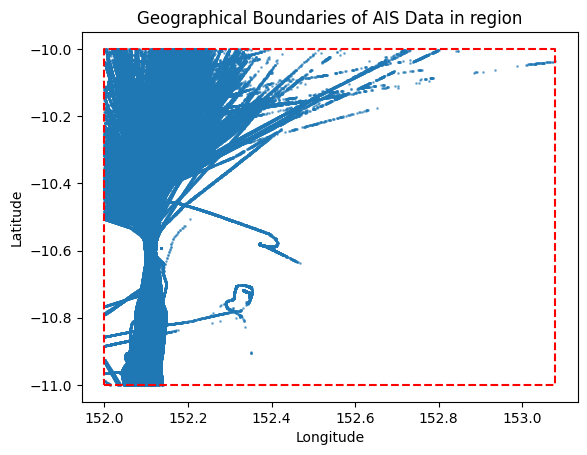

In [6]:
import matplotlib.pyplot as plt

# Plot the latitude and longitude points
plt.scatter(ais_cleaned["Longitude"], ais_cleaned["Latitude"], s=1, alpha=0.5)

# Plot red box of the min, max boundaries
plt.plot([min_longitude, max_longitude, max_longitude, min_longitude, min_longitude],
         [min_latitude, min_latitude, max_latitude, max_latitude, min_latitude],
         color='red', linestyle='--')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Boundaries of AIS Data in region')

# Show the plot
plt.show()


Plot the datapoints into a world map

Install the needed libraries

In [7]:
pip install geopandas

You should consider upgrading via the 'c:\Programs Files\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Programs Files\Python\Python310\python.exe -m pip install --upgrade pip' command.


Import the needed libraries

In [10]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

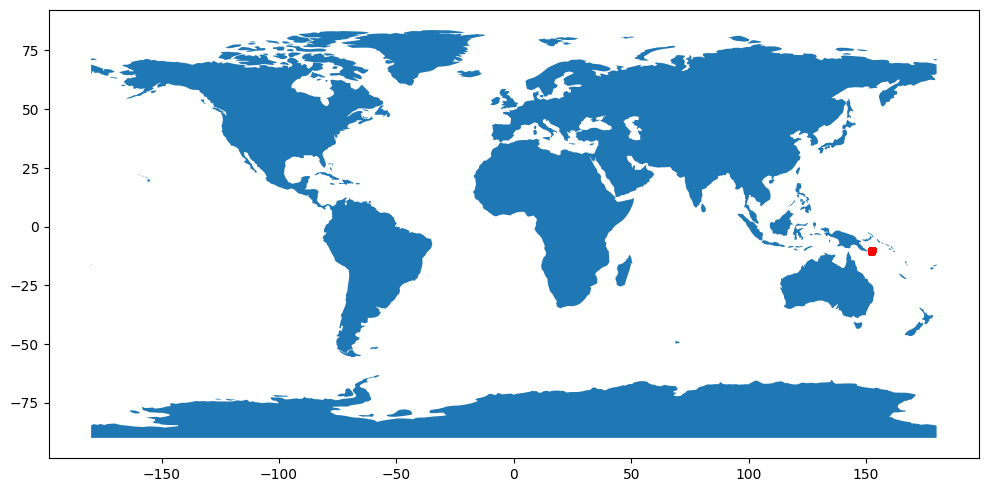

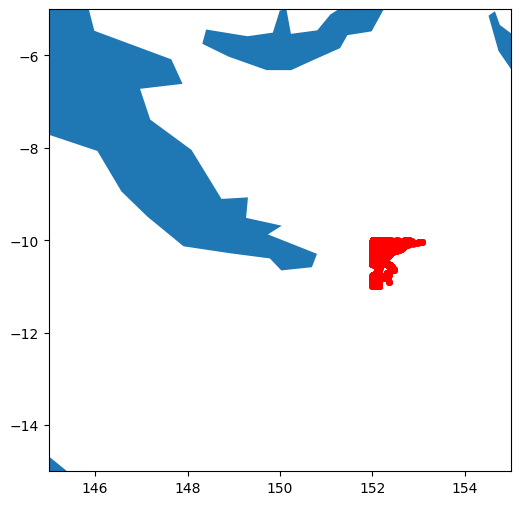

In [11]:
geometry = [Point(xy) for xy in zip(ais_cleaned['Longitude'], ais_cleaned['Latitude'])]
gdf = GeoDataFrame(ais_cleaned, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Plot the datapoints per vessel

In [12]:
MMSI_subset = ais_cleaned[(ais_cleaned["MMSI"]=='538009733')] #replace '538009733' with any other vessel MMSI number

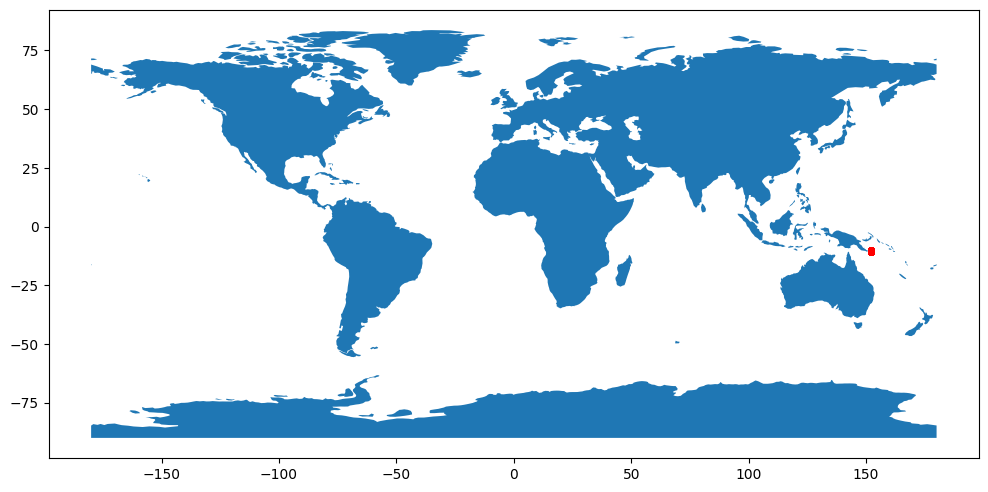

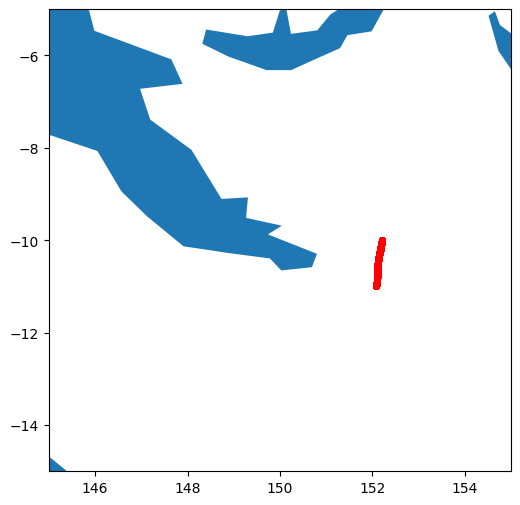

In [13]:
geometry = [Point(xy) for xy in zip(MMSI_subset['Longitude'], MMSI_subset['Latitude'])]
gdf = GeoDataFrame(MMSI_subset, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()